# ============================================
# 🔍 Fase 1: Diagnóstico de Problemas
# ============================================

### Tarea 1: Análisis Exploratorio

In [2]:
# 1. Cargar dataset
import pandas as pd

df = pd.read_csv('reviews_multilang.csv')
df.head()

,texto,idioma,sentimiento
0,La interfaz intuitiva facilita la navegación i...,es,positivo
1,El rendimiento gráfico dejó mucho que desear e...,es,negativo
2,Constantes fallos de conectividad WiFi tras la...,es,negativo
3,Sorprendido por la autonomía de la batería en ...,es,positivo
4,El sistema operativo se bloquea recurrentement...,es,negativo


In [5]:
pip install scikit-learn

  Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl.metadata (15 kB)
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------------ ------------------------- 20.5/60.8 kB 640.0 kB/s eta 0:00:01
     -------------------------------- ----- 51.2/60.8 kB 518.5 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 537.5 kB/s eta 0:00:00
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl (11.1 MB)
   ---------------------------------------- 0.0/307.7 kB ? eta -:--:--
   ---------------------------------------- 307.7/307.7 kB 9.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/41.2 MB ? eta -:--:--
   - -------------------------------------- 1.2/41.2 MB 39.3 MB/s eta 0:00:02
   --- ------------------------------------ 3.3/41.2 MB 41.7 MB/s eta 0:00:01
   ----- ---------------------------------- 5.2/41.2 MB 41.7 MB/s eta 0:00:01
   ------- --------


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
df.columns


Index(['texto', 'idioma', 'sentimiento'], dtype='object')

In [ ]:
# 2. Procesamiento sin lematización
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['texto'])
word_freq = pd.DataFrame({
    'token': vectorizer.get_feature_names_out(), 
    'frecuencia': X.toarray().sum(axis=0)
})
word_freq.sort_values(by='frecuencia', ascending=False).head(20)

,token,frecuencia
66,de,31
87,el,26
149,la,22
89,en,12
52,con,6
153,los,4
245,sistema,4
197,precisión,4
210,que,3
186,pantalla,3


In [11]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
!python -m spacy download es_core_news_sm


     ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
     --------------------------------------- 0.0/12.9 MB 653.6 kB/s eta 0:00:20
      --------------------------------------- 0.3/12.9 MB 2.5 MB/s eta 0:00:05
     -- ------------------------------------- 0.9/12.9 MB 5.8 MB/s eta 0:00:03
     ----- ---------------------------------- 1.7/12.9 MB 8.3 MB/s eta 0:00:02
     ------- -------------------------------- 2.6/12.9 MB 10.2 MB/s eta 0:00:02
     ----------- ---------------------------- 3.7/12.9 MB 12.3 MB/s eta 0:00:01
     --------------- ------------------------ 5.1/12.9 MB 14.9 MB/s eta 0:00:01
     --------------------- ------------------ 6.8/12.9 MB 17.4 MB/s eta 0:00:01
     --------------------------- ------------ 8.9/12.9 MB 20.3 MB/s eta 0:00:01
     ------------------------------- ------- 10.5/12.9 MB 27.3 MB/s eta 0:00:01
     ------------------------------- ------- 10.5/12.9 MB 2


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
# 3. Ejemplo crítico de análisis POS
import spacy

nlp_es = spacy.load("es_core_news_sm")

texto_critico = "Los usuarios reportaron fallas constantes: no funciona, se traba y no responde."
doc = nlp_es(texto_critico)

for token in doc:
    print(f"{token.text:<12} → {token.pos_:<10} | {token.lemma_}")

Los          → DET        | el
usuarios     → NOUN       | usuario
reportaron   → VERB       | reportar
fallas       → NOUN       | falla
constantes   → ADJ        | constante
:            → PUNCT      | :
no           → ADV        | no
funciona     → VERB       | funcionar
,            → PUNCT      | ,
se           → PRON       | él
traba        → VERB       | trar
y            → CCONJ      | y
no           → ADV        | no
responde     → VERB       | responder
.            → PUNCT      | .


In [16]:
!pip install wordcloud

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/106.6 kB ? eta -:--:--
     -------------- ---------------------- 41.0/106.6 kB 991.0 kB/s eta 0:00:01
     -------------------------------------- 106.6/106.6 kB 2.0 MB/s eta 0:00:00
  Using cached kiwisolver-1.4.8-cp311-cp311-win_amd64.whl.metadata (6.3 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   --------------------------------------- 299.9/299.9 kB 18.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------------- -------------------------- 2.7/8.1 MB 83.5 MB/s eta 0:00:01
   ---------------------------- ----------- 5.7/8.1 MB 71.8 MB/s eta 0:00:01
   ---------------------------------------  8.0/8.1 MB 64.3 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 57.1 MB/s eta 0:00:00
   ------------------------------


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


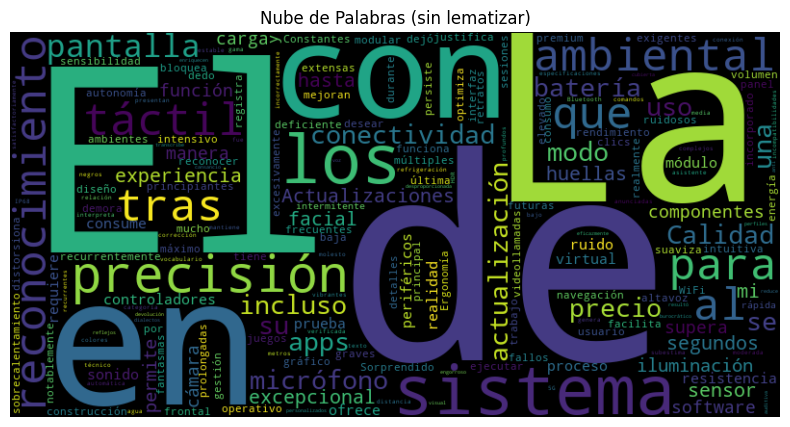

In [17]:
# 4. Nube de palabras
from wordcloud import WordCloud
import matplotlib.pyplot as plt

texto_completo = ' '.join(df['texto'].dropna().tolist())
wordcloud = WordCloud(width=800, height=400).generate(texto_completo)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Nube de Palabras (sin lematizar)")
plt.show()

In [18]:
# 5. Tabla de variantes a unificar
import pandas as pd

variantes = {
    "fallas": "falla",
    "reportaron": "reportar",
    "funciona": "funcionar",
    "trabó": "trabar",
    "responde": "responder"
}
pd.DataFrame(list(variantes.items()), columns=["Variante", "Lema"])

,Variante,Lema
0,fallas,falla
1,reportaron,reportar
2,funciona,funcionar
3,trabó,trabar
4,responde,responder


# ============================================
# 🔧 Fase 2: Implementación del Lematizador
# ============================================

## Tarea 2: Pipeline de Lematización Multilingüe

In [22]:
!pip install nltk langdetect


     ---------------------------------------- 0.0/981.5 kB ? eta -:--:--
     ---------------------------------------- 10.2/981.5 kB ? eta -:--:--
     - ----------------------------------- 41.0/981.5 kB 487.6 kB/s eta 0:00:02
     ------- ------------------------------ 194.6/981.5 kB 1.7 MB/s eta 0:00:01
     -------------------------------------- 981.5/981.5 kB 6.9 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993363 sha256=c8d45b8371a0d533ffb97eb30e0f3c347e57c44a286c05158c50e736bde3f10c
  Stored in directory: c:\users\alumno_ai\appdata\local\pip\cache\wheels\0a\f2\b2\e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c16


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
# Función general de lematización

# Descargar recursos necesarios
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from langdetect import detect

lemmatizer = WordNetLemmatizer()

# Conversión de etiquetas POS para WordNet
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN


# Función general de lematización
def lematizar(texto, idioma=None):
    if not idioma:
        idioma = detect(texto)

    if idioma == "es":
        doc = nlp_es(texto)
        return [token.lemma_.lower() for token in doc if token.is_alpha and (not token.is_stop or token.lower_ in ["no", "bien", "mal"])]

    elif idioma == "en":
        tokens = nltk.word_tokenize(texto)
        pos_tags = nltk.pos_tag(tokens)
        lemas = [
            lemmatizer.lemmatize(word.lower(), pos=get_wordnet_pos(pos))
            for word, pos in pos_tags if word.isalpha()
        ]
        return lemas

    else:
        # Simple tokenización para idiomas no soportados
        return texto.lower().split()



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Alumno_AI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Alumno_AI\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Alumno_AI\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alumno_AI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Alumno_AI\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [36]:
# Prueba de lematización
ejemplo = "Los dispositivos fallaron constantemente, no funcionan bien."
lematizado = lematizar(ejemplo, "es")
print(lematizado)

['dispositivo', 'fallar', 'constantemente', 'no', 'funcionar', 'bien']


# ============================================
# 🚀 Fase 3: Optimización y Validación
# ============================================

## Tarea 3: Comparativa con modelo de ML

In [28]:
df.columns

Index(['texto', 'idioma', 'sentimiento', 'lematizado'], dtype='object')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Lematizar todo el corpus
df['lematizado'] = df.apply(lambda row: ' '.join(lematizar(row['texto'], row['idioma'])), axis=1)


# Vectorización
X_orig = TfidfVectorizer().fit_transform(df['texto'])
X_lem = TfidfVectorizer().fit_transform(df['lematizado'])
y = df['sentimiento'] 

X_train_o, X_test_o, y_train, y_test = train_test_split(X_orig, y, test_size=0.2)
X_train_l, X_test_l, _, _ = train_test_split(X_lem, y, test_size=0.2)

# Modelo sin lematización
clf_o = RandomForestClassifier().fit(X_train_o, y_train)
y_pred_o = clf_o.predict(X_test_o)

# Modelo con lematización
clf_l = RandomForestClassifier().fit(X_train_l, y_train)
y_pred_l = clf_l.predict(X_test_l)

# Comparativa
print("=== Sin lematización ===")
print(classification_report(y_test, y_pred_o))

print("=== Con lematización ===")
print(classification_report(y_test, y_pred_l))

print(f"Reducción de vocabulario: {X_orig.shape[1]} → {X_lem.shape[1]}")

=== Sin lematización ===
              precision    recall  f1-score   support

    negativo       0.33      0.67      0.44         3
    positivo       0.75      0.43      0.55         7

    accuracy                           0.50        10
   macro avg       0.54      0.55      0.49        10
weighted avg       0.62      0.50      0.52        10

=== Con lematización ===
              precision    recall  f1-score   support

    negativo       0.20      0.33      0.25         3
    positivo       0.60      0.43      0.50         7

    accuracy                           0.40        10
   macro avg       0.40      0.38      0.38        10
weighted avg       0.48      0.40      0.42        10

Reducción de vocabulario: 282 → 236


In [40]:
import spacy
from spacy.matcher import PhraseMatcher

# Cargar modelo de spaCy en español
nlp_es = spacy.load("es_core_news_sm")

# Términos técnicos en forma base y variantes
terminos_jerga = ["crasheó", "crashear", "bugueó", "buguear", "laguear", "lagueó", "colgar", "colgó"]

# Crear matcher sensible a texto en minúsculas
matcher = PhraseMatcher(nlp_es.vocab, attr="LOWER")
patterns = [nlp_es(t) for t in terminos_jerga]
matcher.add("JERGA_TECNICA", patterns)

# Función para detectar jergas técnicas
def detectar_jerga(texto):
    doc = nlp_es(texto)
    matches = matcher(doc)
    return [doc[start:end].text for _, start, end in matches]

# Prueba
texto = "El sistema crasheó y luego se bugueó durante la actualización."
print(detectar_jerga(texto))


['crasheó', 'bugueó']


# ============================================
# 📊 Fase 4: Evaluación Comparativa Final
# ============================================

## Tarea 4: Validación con conjunto etiquetado

In [ ]:
# 🔍 Analizar frases con negación
negativas = df[df['texto'].str.contains("no ", case=False)]
negativas['lematizado'] = negativas['texto'].apply(lambda t: lematizar(t, detect(t)))
negativas[['texto', 'lematizado']].head()

C:\Users\Alumno_AI\AppData\Local\Temp\ipykernel_6160\4002838561.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negativas['lematizado'] = negativas['texto'].apply(lambda t: lematizar(t, detect(t)))


,texto,lematizado
6,El micrófono incorporado tiene una sensibilida...,"[micrófono, incorporado, sensibilidad, deficie..."
35,El micrófono no filtra adecuadamente el ruido ...,"[micrófono, filtrar, adecuadamente, ruido, amb..."


# ✅ Entrega Final

## 📌 Función final: `lematizar(texto, idioma)`
> Ver celda correspondiente arriba.

## 📄 Reporte PDF (generar por separado)
- Comparativa F1-score pre y post lematización
- Tamaño del vocabulario
- Tabla de errores corregidos:
  | Original        | Lematizado    |
  |-----------------|---------------|
  | trabó           | trabar        |
  | fallas          | falla         |
  | no funciona     | no funcionar  |
